In [3]:
import numpy as np
import pandas as pd
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.metrics import r2_score,classification_report,f1_score,matthews_corrcoef,recall_score,plot_roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,mean_squared_error,mean_absolute_error
%matplotlib inline
import seaborn as sns

In [5]:
#Loading the dataset
data = pd.read_csv('/home/pysagar/Desktop/heart_failure.csv')

#Print the first 5 rows of the dataframe.
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
X = data.drop('DEATH_EVENT',axis=1)
y = data['DEATH_EVENT']

In [7]:
X.shape

(299, 12)

In [8]:
## Train test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
log_reg = LogisticRegression()

In [11]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [12]:
logr_pred = log_reg.predict(X_test)


In [13]:
accuracyLR = accuracy_score(y_test,logr_pred)
accuracyLR

0.8666666666666667

# Hyper parameter tuning of Logistics Regression

In [ ]:
log_reg = LogisticRegression()
grid = {"penalty" : ["l1", "l2"],"C" : np.arange(0,100,1)}
log_reg_cv = GridSearchCV(log_reg, grid, cv=3)
log_reg_cv.fit(X_train,y_train)

In [15]:
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_)) 
print("Best score: {}".format(log_reg_cv.best_score_))
print("Best Estimator: {}".format(log_reg_cv.best_estimator_))

Tuned hyperparameter n_estimators: {'C': 3, 'penalty': 'l2'}
Best score: 0.7824894514767932
Best Estimator: LogisticRegression(C=3)


In [16]:
results_NB = pd.DataFrame(log_reg_cv.cv_results_['params'])
results_NB['test_score'] = log_reg_cv.cv_results_['mean_test_score']
results_NB

,C,penalty,test_score
0,0,l1,NaN
1,0,l2,NaN
2,1,l1,NaN
3,1,l2,0.778323
4,2,l1,NaN
...,...,...,...
195,97,l2,0.782489
196,98,l1,NaN
197,98,l2,0.782489
198,99,l1,NaN


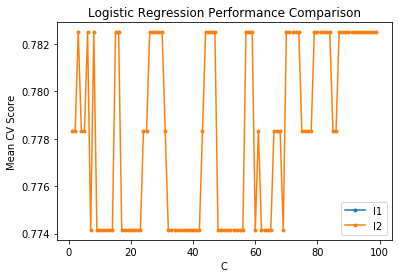

In [17]:
import matplotlib.pyplot as plt
for i in ['l1', 'l2']:
    temp = results_NB[results_NB['penalty'] == i]
    temp_average = temp.groupby('C').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('C')
plt.ylabel("Mean CV Score")
plt.title("Logistic Regression Performance Comparison")
plt.show()

/home/pysagar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)




Accuracy:  0.8666666666666667
f1-score: 0.7142857142857143
Precision score:  0.7142857142857143
Recall score:  0.7142857142857143
MCC:  0.6273291925465838
Mean Squared Error: 0.3651483716701107
Mean Absolute Error: 0.3651483716701107


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        46
           1       0.71      0.71      0.71        14

    accuracy                           0.87        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.87      0.87      0.87        60





Text(0.5, 1, 'Confusion Matrix')

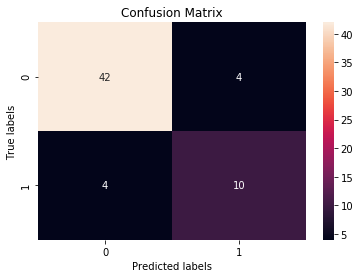

In [18]:
model_LR = log_reg_cv.best_estimator_
model_LR.fit(X_train,y_train)
predictions_LR =  model_LR.predict(X_test)
print('\n')
print('Accuracy: ', accuracy_score(y_test,predictions_LR))
print('f1-score:', f1_score(y_test, predictions_LR))
print('Precision score: ', precision_score(y_test,predictions_LR))
print('Recall score: ', recall_score(y_test,predictions_LR))
print('MCC: ',matthews_corrcoef(y_test,predictions_LR) )
print('Mean Squared Error:', mean_squared_error(y_test, predictions_LR) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions_LR) ** 0.5)
print('\n')
print(classification_report(y_test, predictions_LR))
print('\n')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predictions_LR), annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#accNameListAfterTuning.append('LogisticRegression')
#accValueListAfterTuning.append(accuracy_score(y_test,predictions_LR))

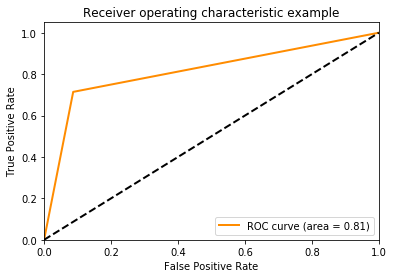

In [27]:
clf = LogisticRegression()
model=log_reg.fit(X_train,y_train)
pred_val = log_reg.predict(X_test)

### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, pred_val)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("accuracy: ", accuracy_score(y_test, predictions))


accuracy:  0.9166666666666666


# Hyperparameter Tuning of Random Forest

In [ ]:
grid = {"n_estimators" : np.arange(0,200,2)}
rf = RandomForestClassifier()
rf_random = GridSearchCV(rf, grid, cv=3)
rf_random.fit(X_train,y_train)

In [30]:
print(rf_random.best_params_)
print(rf_random.best_estimator_) 

{'n_estimators': 154}
RandomForestClassifier(n_estimators=154)


In [31]:
results_NB = pd.DataFrame(rf_random.cv_results_['params'])
results_NB['test_score'] = rf_random.cv_results_['mean_test_score']
results_NB

,n_estimators,test_score
0,0,NaN
1,2,0.740295
2,4,0.770095
3,6,0.786656
4,8,0.795148
...,...,...
95,190,0.815928
96,192,0.828534
97,194,0.820095
98,196,0.807489


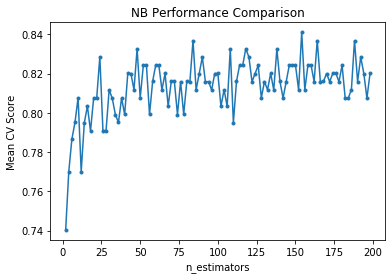

In [32]:
plt.plot(results_NB['n_estimators'], results_NB['test_score'], marker = '.') 
plt.xlabel('n_estimators')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()



Accuracy:  0.9
f1-score: 0.7857142857142857
Precision score:  0.7857142857142857
Recall score:  0.7857142857142857
MCC:  0.7204968944099379
Mean Squared Error: 0.31622776601683794
Mean Absolute Error: 0.31622776601683794


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.79      0.79      0.79        14

    accuracy                           0.90        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.90      0.90      0.90        60





Text(0.5, 1, 'Confusion Matrix')

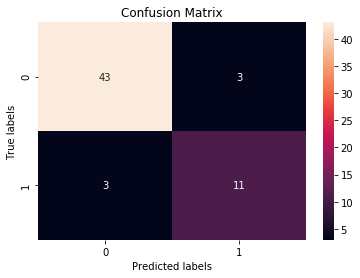

In [33]:
model_RF = rf_random.best_estimator_
model_RF.fit(X_train,y_train)
predictions_RF =  model_RF.predict(X_test)
print('\n')
print('Accuracy: ', accuracy_score(y_test,predictions_RF))
print('f1-score:', f1_score(y_test, predictions_RF))
print('Precision score: ', precision_score(y_test,predictions_RF))
print('Recall score: ', recall_score(y_test,predictions_RF))
print('MCC: ',matthews_corrcoef(y_test,predictions_RF) )
print('Mean Squared Error:', mean_squared_error(y_test, predictions_RF) ** 0.5)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions_RF) ** 0.5)
print('\n')
print(classification_report(y_test, predictions_RF))
print('\n')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predictions_RF), annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

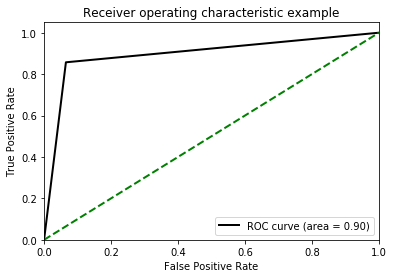

In [34]:

### Fit a sklearn classifier on train dataset and output probabilities
clf = RandomForestClassifier()
model=clf.fit(X_train, y_train)
pred_val = clf.predict(X_test)



### Compute ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test, pred_val)
roc_auc = auc(fpr, tpr)

### Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()